Support Vector Machines (SVMs) are powerful supervised learning models used for both classification and regression tasks. Here's an overview of SVMs:

1.Objective:
1. Classification: SVMs are commonly used for binary classification tasks, aiming to separate data points into different classes by finding the best decision boundary (hyperplane) that maximizes the margin between classes.
2. Regression: SVMs can be used for regression tasks by predicting continuous values while minimizing errors.

2.Principle:
1. SVMs classify data by finding the hyperplane that best divides different classes. The hyperplane is chosen to maximize the margin, which is the distance between the hyperplane and the nearest data points (called support vectors) from each class.For non-linearly separable data, SVMs use kernel methods to map data into a higher-dimensional space where it can be linearly separated.

3.Key Concepts:
1. Decision Boundary: The hyperplane that separates different classes.
2. Support Vectors: Data points closest to the decision boundary, influencing the position and orientation of the boundary.
3. Margin: The distance between the decision boundary and the support vectors. A wider margin indicates better generalization to new data.
4. Kernel Trick: A mathematical method to transform data into a higher-dimensional space without explicitly calculating the new feature space.

4.Advantages:
1. Effective in high-dimensional spaces and when the number of dimensions is greater than the number of samples.
2. Versatile due to the use of different kernel functions for various data distributions.
3. Robust against overfitting, especially with appropriate regularization parameters.

5.Disadvantages:
1. Computationally intensive, especially for large datasets.
2. Choice of kernel and regularization parameters can impact performance and require careful tuning.
3. Less effective when dealing with noisy datasets or when classes overlap considerably.

6.Applications:
1. Text classification and sentiment analysis.
2. Image classification and recognition.
3. Bioinformatics, such as protein classification.
4. Financial forecasting and regression tasks.
5. Medical diagnosis and biological studies.

SVMs are widely used due to their effectiveness in handling complex classification problems and their ability to generalize well to new data. However, selecting the appropriate kernel and tuning parameters are crucial for achieving optimal performance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Generate synthetic data
X, y = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42, flip_y=0.2)

In [3]:
X

array([[-0.04862909, -2.17105282],
       [ 1.38991764, -0.56772453],
       [ 1.09180466,  1.17869556],
       [ 0.57304248,  0.34129395],
       [-0.3751207 , -0.57500215],
       [ 1.94087643,  2.52983424],
       [ 1.85605469, -0.05319823],
       [-0.14994102,  1.80474148],
       [-0.38919817,  1.50575249],
       [ 1.25291095,  1.09885263],
       [-1.42922002,  0.71479373],
       [ 0.62453032,  0.32725188],
       [-1.56826626, -1.40735658],
       [-1.14658127,  0.85239186],
       [-1.26898369, -1.20757158],
       [-0.17593681, -2.3279946 ],
       [-0.42795824,  1.56070438],
       [-1.32933233,  0.6273745 ],
       [-1.79532002,  0.25415746],
       [-0.35885569,  1.65214494],
       [-1.5332749 , -1.4117586 ],
       [ 2.38869353,  0.55942643],
       [ 0.49429823,  0.07123641],
       [ 1.06173727, -0.91916686],
       [ 1.56931739, -0.3313761 ],
       [ 0.55448398,  1.03110238],
       [ 1.48052803, -0.50833095],
       [-1.92487377, -1.5598485 ],
       [-1.20592943,

In [4]:
y

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create SVM classifier and train the model
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(f"Accuracy of SVC model is - {accuracy_score(y_pred,y_test)}")

Accuracy of SVC model is - 0.9


C:\Users\argad\AppData\Local\Temp\ipykernel_9008\192623707.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=colors[y], cmap=plt.cm.Paired)
C:\Users\argad\AppData\Local\Temp\ipykernel_9008\192623707.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=colors[y], cmap=plt.cm.Paired)


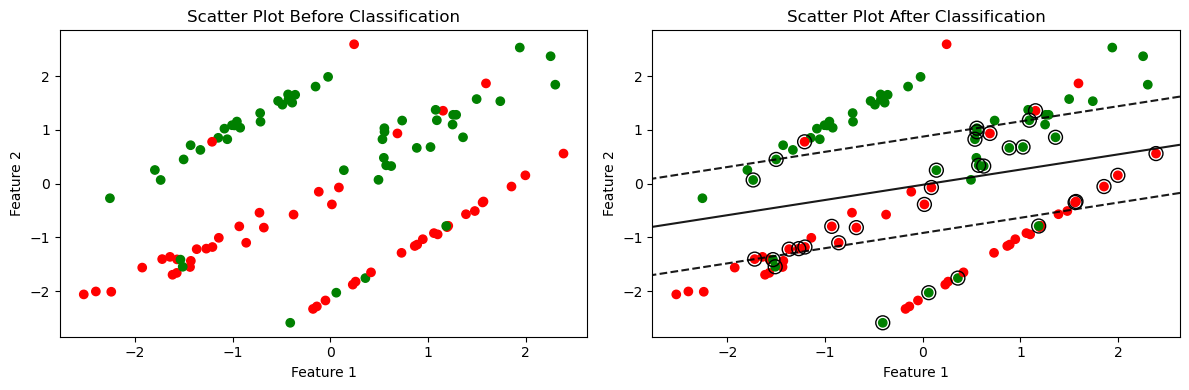

In [6]:
# Define colors for classes
colors = np.array(['red', 'green'])

# Plot before classification
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=colors[y], cmap=plt.cm.Paired)
plt.title('Scatter Plot Before Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary after classification
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=colors[y], cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.9, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('Scatter Plot After Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()
